Solve Sudoku with Simulated Annealing vs Back Tracking Algorithm

Simulated Annealing

In [12]:
import random 
import numpy as np 
import math  
from random import choice 
import statistics  
 
startingSudoku = """ 
                    530070000
                    600195000
                    098000060
                    800060003
                    400803001
                    700020006
                    060000280
                    000419005
                    000080079                """ 
 
sudoku = np.array([[int(i) for i in line] for line in startingSudoku.split()]) 
print(sudoku) 
 
def PrintSudoku(sudoku): 
    print("\n") 
    for i in range(len(sudoku)): 
        line = "" 
        if i == 3 or i == 6: 
            print("---------------------") 
        for j in range(len(sudoku[i])): 
            if j == 3 or j == 6: 
                line += "| " 
            line += str(sudoku[i,j])+" " 
        print(line) 
 
def FixSudokuValues(fixed_sudoku): 
    for i in range (0,9): 
        for j in range (0,9): 
            if fixed_sudoku[i,j] != 0: 
                fixed_sudoku[i,j] = 1 
     
    return(fixed_sudoku) 
 
# Cost Function     
def CalculateNumberOfErrors(sudoku): 
    numberOfErrors = 0  
    for i in range (0,9): 
        numberOfErrors += CalculateNumberOfErrorsRowColumn(i ,i ,sudoku) 
    return(numberOfErrors) 
 
def CalculateNumberOfErrorsRowColumn(row, column, sudoku): 
    numberOfErrors = (9 - len(np.unique(sudoku[:,column]))) + (9 - len(np.unique(sudoku[row,:]))) 
    return(numberOfErrors) 
 
 
def CreateList3x3Blocks (): 
    finalListOfBlocks = [] 
    for r in range (0,9): 
        tmpList = [] 
        block1 = [i + 3*((r)%3) for i in range(0,3)] 
        block2 = [i + 3*math.trunc((r)/3) for i in range(0,3)] 
        for x in block1: 
            for y in block2: 
                tmpList.append([x,y]) 
        finalListOfBlocks.append(tmpList) 
    return(finalListOfBlocks) 
 
def RandomlyFill3x3Blocks(sudoku, listOfBlocks): 
    for block in listOfBlocks: 
        for box in block: 
            if sudoku[box[0],box[1]] == 0: 
                currentBlock = sudoku[block[0][0]:(block[-1][0]+1),block[0][1]:(block[-1][1]+1)] 
                sudoku[box[0],box[1]] = choice([i for i in range(1,10) if i not in currentBlock]) 
    return sudoku 
 
def SumOfOneBlock (sudoku, oneBlock): 
    finalSum = 0 
    for box in oneBlock: 
        finalSum += sudoku[box[0], box[1]] 
    return(finalSum) 
 
def TwoRandomBoxesWithinBlock(fixedSudoku, block): 
    while (1): 
        firstBox = random.choice(block) 
        secondBox = choice([box for box in block if box is not firstBox ]) 
 
        if fixedSudoku[firstBox[0], firstBox[1]] != 1 and fixedSudoku[secondBox[0], secondBox[1]] != 1: 
            return([firstBox, secondBox]) 
 
def FlipBoxes(sudoku, boxesToFlip): 
    proposedSudoku = np.copy(sudoku) 
    placeHolder = proposedSudoku[boxesToFlip[0][0], boxesToFlip[0][1]] 
    proposedSudoku[boxesToFlip[0][0], boxesToFlip[0][1]] = proposedSudoku[boxesToFlip[1][0], boxesToFlip[1][1]] 
    proposedSudoku[boxesToFlip[1][0], boxesToFlip[1][1]] = placeHolder 
    return (proposedSudoku) 
 
def ProposedState (sudoku, fixedSudoku, listOfBlocks): 
    randomBlock = random.choice(listOfBlocks) 
 
    if SumOfOneBlock(fixedSudoku, randomBlock) > 6:   
        return(sudoku, 1, 1) 
    boxesToFlip = TwoRandomBoxesWithinBlock(fixedSudoku, randomBlock) 
    proposedSudoku = FlipBoxes(sudoku,  boxesToFlip) 
    return([proposedSudoku, boxesToFlip]) 
 
def ChooseNewState (currentSudoku, fixedSudoku, listOfBlocks, sigma): 
    proposal = ProposedState(currentSudoku, fixedSudoku, listOfBlocks) 
    newSudoku = proposal[0] 
    boxesToCheck = proposal[1] 
    currentCost = CalculateNumberOfErrorsRowColumn(boxesToCheck[0][0], boxesToCheck[0][1], currentSudoku) + CalculateNumberOfErrorsRowColumn(boxesToCheck[1][0], boxesToCheck[1][1], currentSudoku) 
    newCost = CalculateNumberOfErrorsRowColumn(boxesToCheck[0][0], boxesToCheck[0][1], newSudoku) + CalculateNumberOfErrorsRowColumn(boxesToCheck[1][0], boxesToCheck[1][1], newSudoku) 
    # currentCost = CalculateNumberOfErrors(currentSudoku)
    # newCost = CalculateNumberOfErrors(newSudoku) 
    costDifference = newCost - currentCost 
    rho = math.exp(-costDifference/sigma) 
    x = np.random.uniform(1,0,1)
    print(f'u(0,1): {x} and p_expo: {rho} and [D] : {costDifference} and temperature : {sigma}')
    if(x < rho):
        print("accepted") 
        print(f'new cost : {newCost}')
        return([newSudoku, costDifference]) 
    else: 
        print("---> not accept this state")
    print(f'current cost : {currentCost}')
    return([currentSudoku, 0]) 
 
 
def ChooseNumberOfItterations(fixed_sudoku): 
    numberOfItterations = 0 
    for i in range (0,9): 
        for j in range (0,9): 
            if fixed_sudoku[i,j] != 0: 
                numberOfItterations += 1
    print(f'number of iteration: {numberOfItterations}') 
    return numberOfItterations 
 
def CalculateInitialSigma (sudoku, fixedSudoku, listOfBlocks): 
    listOfDifferences = [] 
    tmpSudoku = sudoku 
    for i in range(1,10): 
        tmpSudoku = ProposedState(tmpSudoku, fixedSudoku, listOfBlocks)[0] 
        listOfDifferences.append(CalculateNumberOfErrors(tmpSudoku)) 
    T = (statistics.pstdev(listOfDifferences)) 
    print("the initial temperature : ", T)
    return T
 
def solveSudoku (sudoku): 
    f = open("demofile2.txt", "a") 
    solutionFound = 0 
    count = 0
    scorehistory = []
    while (solutionFound == 0): 
        decreaseFactor = 0.99 
        stuckCount = 0 
        fixedSudoku = np.copy(sudoku) 
        PrintSudoku(sudoku) 
        FixSudokuValues(fixedSudoku) 
        listOfBlocks = CreateList3x3Blocks() 
        tmpSudoku = RandomlyFill3x3Blocks(sudoku, listOfBlocks) 
        sigma = CalculateInitialSigma(sudoku, fixedSudoku, listOfBlocks) 
        score = CalculateNumberOfErrors(tmpSudoku) 
        itterations = ChooseNumberOfItterations(fixedSudoku) 
        if score <= 0: 
            solutionFound = 1 
 
        while solutionFound == 0: 
            previousScore = score 
            print("_________________nested")
            for i in range (0, itterations): 
                newState = ChooseNewState(tmpSudoku, fixedSudoku, listOfBlocks, sigma) 
                tmpSudoku = newState[0] 
                scoreDiff = newState[1] 
                score += scoreDiff
                count +=1
                scorehistory.append(score) 
                print(score) 
                f.write(str(score) + '\n') 
                if score <= 0: 
                    solutionFound = 1 
                    break 
 
            sigma *= decreaseFactor 
            print(f'--> after cooling new temperature : {sigma}')
            if score <= 0: 
                solutionFound = 1 
                break 
            if score >= previousScore: 
                stuckCount += 1 
            else: 
                stuckCount = 0 
            if (stuckCount > 80): 
                sigma += 2 
            if(CalculateNumberOfErrors(tmpSudoku)==0): 
                PrintSudoku(tmpSudoku) 
                break 
    f.close() 
    return(tmpSudoku), (count, scorehistory)
 
solution, scoredist = solveSudoku(sudoku) 
print(CalculateNumberOfErrors(solution)) 
PrintSudoku(solution)
print(scoredist)

[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]


5 3 0 | 0 7 0 | 0 0 0 
6 0 0 | 1 9 5 | 0 0 0 
0 9 8 | 0 0 0 | 0 6 0 
---------------------
8 0 0 | 0 6 0 | 0 0 3 
4 0 0 | 8 0 3 | 0 0 1 
7 0 0 | 0 2 0 | 0 0 6 
---------------------
0 6 0 | 0 0 0 | 2 8 0 
0 0 0 | 4 1 9 | 0 0 5 
0 0 0 | 0 8 0 | 0 7 9 
the initial temperature :  2.042752923427804
number of iteration: 30
_________________nested
u(0,1): [0.51261181] and p_expo: 1.0 and [D] : 0 and temperature : 2.042752923427804
accepted
new cost : 10
57
u(0,1): [0.66547156] and p_expo: 1.0 and [D] : 0 and temperature : 2.042752923427804
accepted
new cost : 12
57
u(0,1): [0.07381451] and p_expo: 1.6315581262365313 and [D] : -1 and temperature : 2.042752923427804
accepted
new cost : 13
56
u(0,1): [0.73924744] and p_expo: 1.0 and [D] : 0 and temperature : 2.042752923427804
accepted
new cost : 10
56
u(0,

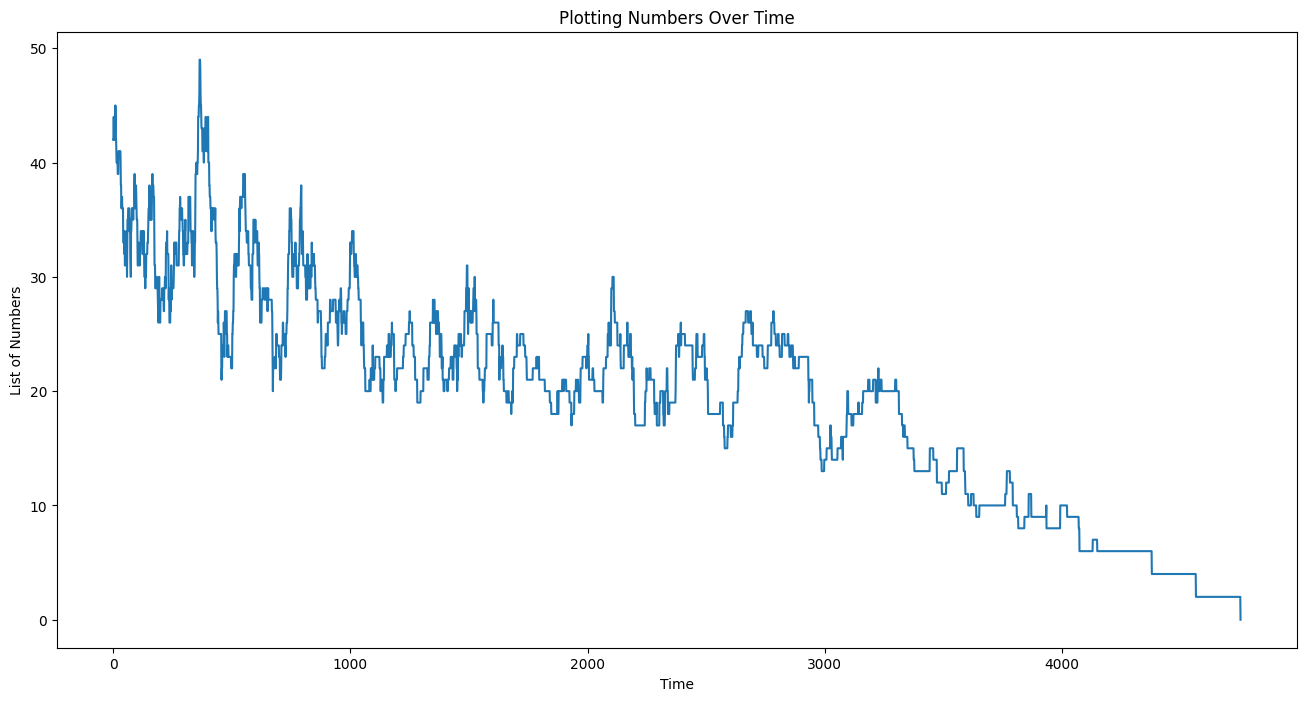

In [5]:

import matplotlib.pyplot as plt
import numpy as np

# Generate a list of numbers
numbers = scoredist[1]

# Generate corresponding time values (assuming equal intervals)
time_values = np.arange(len(numbers))

# Plot the list of numbers over time
plt.figure(figsize=(16,8))
plt.plot(time_values, numbers, linestyle='-')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('List of Numbers')
plt.title('Plotting Numbers Over Time')

# Show the plot
plt.show()

Back Tracking

In [13]:
board = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]
# board = sudoku.tolist()
count = 0
def solve(puzzle):
    global count
    count +=1
    print(puzzle)
    find = find_empty(puzzle)
    if not find:
        return True # if there is no place( no zero ) to fill
    else:
        row, col = find

    for guess in range(1,10):
        if valid(puzzle, guess, (row, col)):
            puzzle[row][col] = guess # adding new guess value to the board

            if solve(puzzle): # called recursive to continue to guess the next zero until there is no more zero -> True then return True
                return True
            # all 1 to 9 doesn't fit return false when it is false it come back here
            # print("b",row,col)
            puzzle[row][col] = 0
            # print("c",row,col)
            
    # print("a",row,col)
    return False


def valid(puzzle, guess, pos):
# detecting guess number
    row, col = pos
    # Check row
    row_vals = puzzle[row]
    if guess in row_vals:
        return False # if we've repeated, then our guess is not valid!
    # Check col
    col_vals = [puzzle[i][col] for i in range(9)]
    if guess in col_vals:
        return False

    # and then the square
    row_start = (row // 3) * 3 # 10 // 3 = 3, 5 // 3 = 1, 1 // 3 = 0
    col_start = (col // 3) * 3

    for r in range(row_start, row_start + 3):
        for c in range(col_start, col_start + 3):
            if puzzle[r][c] == guess:
                return False
# if we can't detect the guess num that haven't placed then
    return True


def print_board(bo):
    for i in range(len(bo)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")

        for j in range(len(bo[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")

            if j == 8:
                print(bo[i][j])
            else:
                print(str(bo[i][j]) + " ", end="")


def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)  # row, col

    return None

print_board(board)
solve(board)
print("\n<--------Solution-------->\n")
print_board(board)
print(count)

5 3 0  | 0 7 0  | 0 0 0
6 0 0  | 1 9 5  | 0 0 0
0 9 8  | 0 0 0  | 0 6 0
- - - - - - - - - - - - - 
8 0 0  | 0 6 0  | 0 0 3
4 0 0  | 8 0 3  | 0 0 1
7 0 0  | 0 2 0  | 0 0 6
- - - - - - - - - - - - - 
0 6 0  | 0 0 0  | 2 8 0
0 0 0  | 4 1 9  | 0 0 5
0 0 0  | 0 8 0  | 0 7 9
[[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]
[[5, 3, 1, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]
[[5, 3, 1, 2, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0